# Analiza osób, które wsparły finansowo kampanię wyborczą.
Celem tej analizy jest wskazanie osób, które mogą finansowo wesprzeć kampanię wyborczą. Założeniem jest, że osoby, które zarabiają ponad 50K rocznie mogą udzielić nam wsparcia.

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
df = pd.read_csv('https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/adult.data')

## Wstępna analiza

In [159]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Dataset nie zawiera kolumn, należy dodać je osobno.

In [160]:
column_names = ['age', 'workclass', 'fnlwgt','education','education-num','marital-status','occupation',
                'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'Income']    
df = pd.DataFrame(df.values, columns = column_names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  object
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  object
 3   education       32560 non-null  object
 4   education-num   32560 non-null  object
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  object
 11  capital-loss    32560 non-null  object
 12  hours-per-week  32560 non-null  object
 13  native-country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


Wszystkie kolumny mają typ object. Użyjemy funkcji infer_objects i zobaczymy czy to coś zmieni.

In [161]:
df = df.infer_objects()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Dane mają odpowiedni typ.

In [14]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

### Wnioski ze wstępnej analizy

Mamy 32560 osób w bazie. Dane są kompletne. Średni wiek osoby badanej to 39 lat. Badani średnio pracują 40 godzin tygodniowo.  

## Analiza szczegółowa

Sprawdzimy dokładnie wartości naszych danych.

In [99]:
for i in column_names:
    print(f'{i}:\n {df[i].value_counts()}\n')

age:
 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

workclass:
  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

fnlwgt:
 164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: fnlwgt, Length: 21647, dtype: int64

education:
  HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschoo

Kolumna occupation zawiera 1836 a kolumna native_country zawiera 583 wpisów "?". Wiersze z tymi danymi zostaną usunięte podobnie jak kolumna fnlwgt.

In [162]:
df = df[df['occupation'] != "?"]
df = df[df['native-country'] != "?"]
df = df.drop(['fnlwgt'], axis = 1)

In [118]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Sprawdzimy jak kształtują się zarobki wśród badanych.

In [119]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

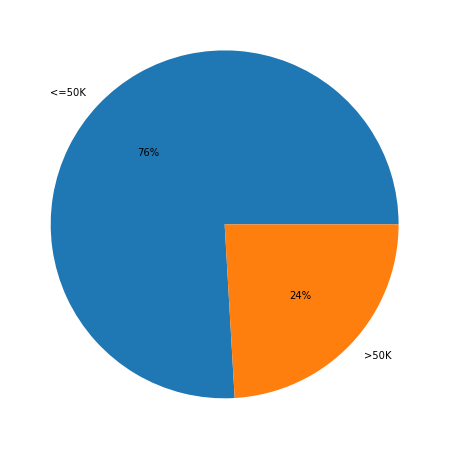

In [120]:
plt.figure(figsize=(12,8))

plt.pie(df['Income'].value_counts(), autopct='%0.0f%%', labels = ['<=50K', '>50K']);

7841 respondentów zarabia ponad 50K na rok co stanowi 24% badanych.
Dalej przayjrzymy się dokładnemu rozkładowi zarobków.

In [67]:
df['sex'].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

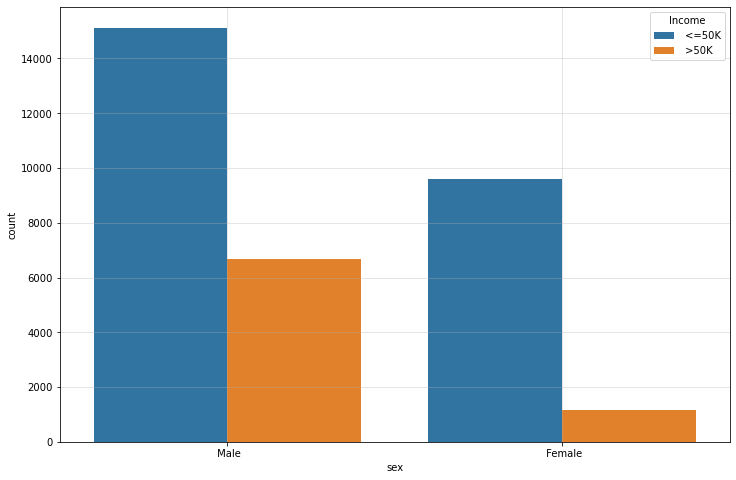

In [125]:
plt.figure(figsize=(12,8))

sns.countplot(x = 'sex', hue='Income', data = df)
plt.grid(visible = True, alpha = 0.4)

Większa ilość mężczyzn zarabia ponad 50K.

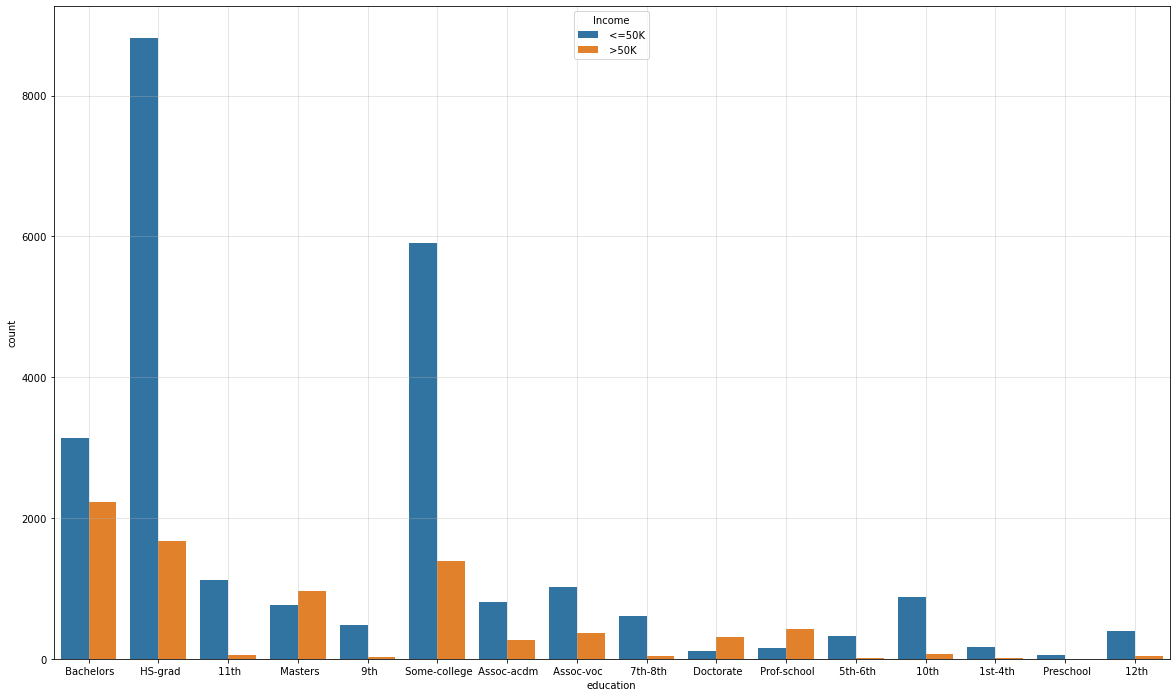

In [138]:
plt.figure(figsize=(20,12))

sns.countplot(x = 'education', hue='Income', data = df)
plt.grid(visible = True, alpha = 0.4)

Im wyższe wykształcenie tym wyższe zarobki. Widać to przede wszystkim w grupach wykształcenia Masters, Doctorate i Bachelors.
Do dalszej części analizy zminimy wartości Income na 0 i 1 i zobaczymy korelacje.

In [169]:
df['Income'] = df['Income'].str.strip()
df['Income'] = df['Income'].replace({'<=50K': 0, '>50K': 1})
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


<AxesSubplot:>

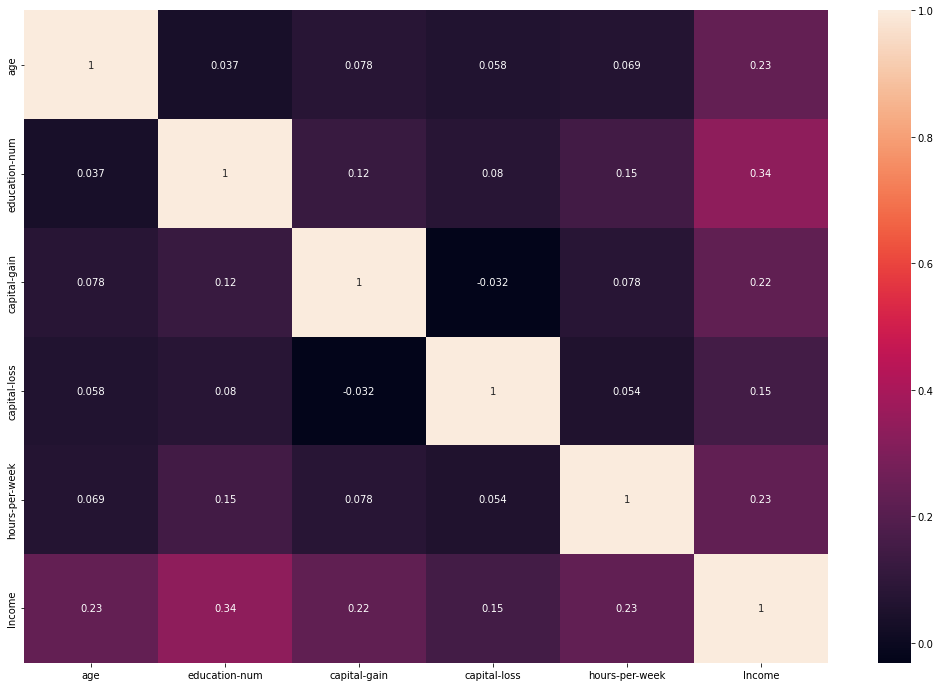

In [166]:
plt.figure(figsize=(18,12))

sns.heatmap(df.corr(), annot=True)


### Wnioski ze szczegółowej analizy
Zgodnie z wcześniejszymi ustaleniami istnieje zależnośc pomiędzy zarobkami a wykształceniem. Największą grupę stanowią osoby ze średnim wykształceniem. Zarobki rosną także z wiekiem.
Mężczyźni zarabiają więcej od kobiet. Dane należy przygotować do uczenia maszynowego

## Przygotowanie danych do modelowania.

In [191]:
df_ml = df.copy()

In [192]:
df_ml = pd.get_dummies(df_ml, drop_first = True)
df_ml.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,Income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,53,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,28,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,14,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [197]:
X = df_ml.drop(['Income'], axis = 1)
y = df_ml['Income'].values

In [198]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X= sc.fit_transform(X)

In [199]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [200]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,-0.775755,1.523480,-0.145914,-0.216663,-0.845315,-0.174298,-0.262102,-0.014664,-1.516869,-0.188392,...,-0.033729,-0.059275,-0.019201,-0.049629,-0.039608,-0.023519,-0.024164,0.34096,-0.045409,-0.022173
1,-0.775755,-0.420027,-0.145914,-0.216663,1.179398,-0.174298,-0.262102,-0.014664,0.659253,-0.188392,...,-0.033729,-0.059275,-0.019201,-0.049629,-0.039608,-0.023519,-0.024164,0.34096,-0.045409,-0.022173
2,2.449949,-0.420027,-0.145914,-0.216663,-1.655200,-0.174298,-0.262102,-0.014664,-1.516869,-0.188392,...,-0.033729,-0.059275,-0.019201,-0.049629,-0.039608,-0.023519,-0.024164,0.34096,-0.045409,-0.022173
3,0.250605,-0.420027,-0.145914,-0.216663,-1.250258,-0.174298,-0.262102,-0.014664,0.659253,-0.188392,...,-0.033729,-0.059275,-0.019201,-0.049629,-0.039608,-0.023519,-0.024164,0.34096,-0.045409,-0.022173
4,-0.335886,-2.363533,-0.145914,-0.216663,-0.035430,-0.174298,-0.262102,-0.014664,0.659253,-0.188392,...,-0.033729,-0.059275,-0.019201,-0.049629,-0.039608,-0.023519,-0.024164,0.34096,-0.045409,-0.022173


## Uczenie maszynowe

### Regresja logistyczna

Dokładność: 85.0%
Raport:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      7416
           1       0.73      0.60      0.66      2352

    accuracy                           0.85      9768
   macro avg       0.80      0.76      0.78      9768
weighted avg       0.84      0.85      0.84      9768



''

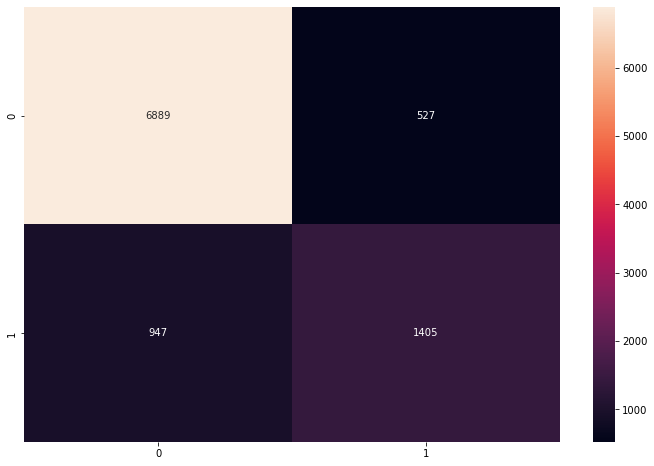

In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

plt.figure(figsize = (12, 8))
model = LogisticRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g')
;


### Las losowy

Dokładność: 85.0%
Raport:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      7416
           1       0.71      0.62      0.66      2352

    accuracy                           0.85      9768
   macro avg       0.80      0.77      0.78      9768
weighted avg       0.84      0.85      0.84      9768



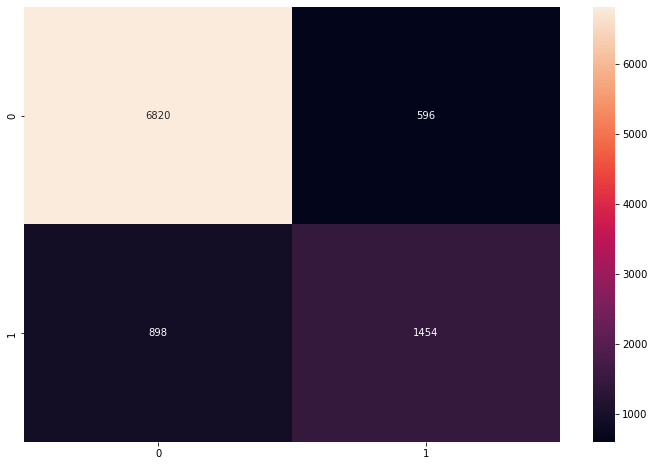

In [215]:
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize = (12, 8))
model = RandomForestClassifier()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g');

### SVM

Dokładność: 85.0%
Raport:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      7416
           1       0.74      0.58      0.65      2352

    accuracy                           0.85      9768
   macro avg       0.81      0.76      0.78      9768
weighted avg       0.84      0.85      0.84      9768



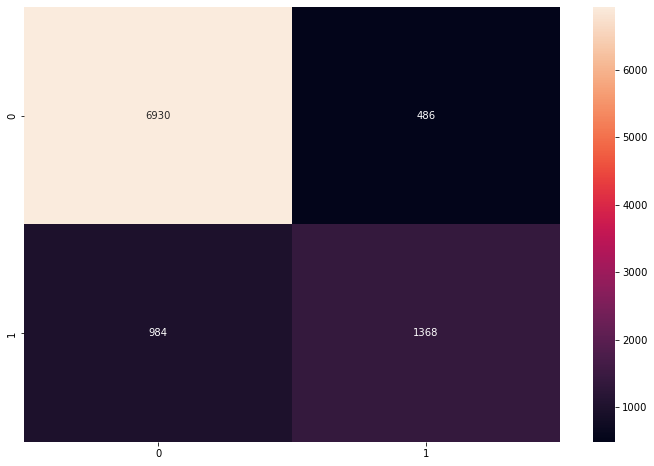

In [216]:
from sklearn.svm import SVC

plt.figure(figsize = (12, 8))
model = SVC(C = 1.0, kernel = 'linear')
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g');

### Bayes

Dokładność: 36.0%
Raport:
               precision    recall  f1-score   support

           0       0.97      0.16      0.27      7416
           1       0.27      0.98      0.42      2352

    accuracy                           0.36      9768
   macro avg       0.62      0.57      0.35      9768
weighted avg       0.80      0.36      0.31      9768



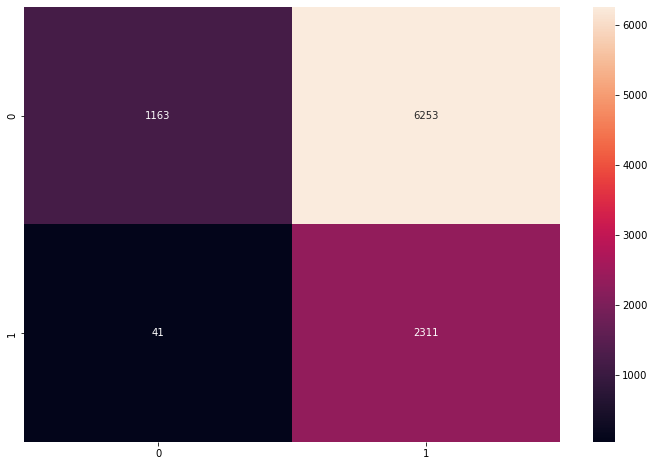

In [223]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
plt.figure(figsize = (12, 8))
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g');

### KNN

Dokładność: 83.0%
Raport:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      7416
           1       0.66      0.58      0.62      2352

    accuracy                           0.83      9768
   macro avg       0.76      0.74      0.75      9768
weighted avg       0.82      0.83      0.82      9768



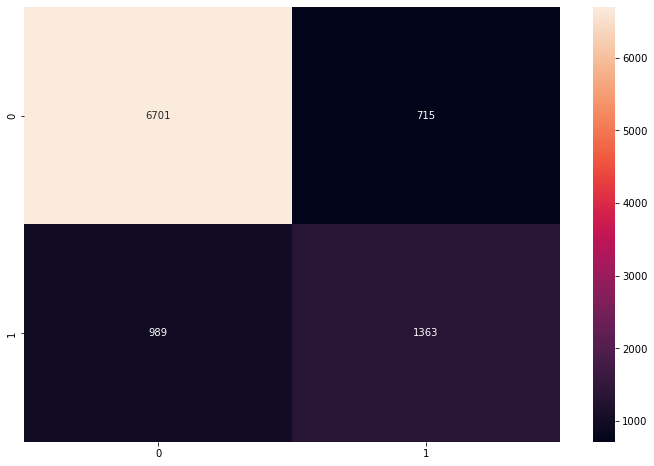

In [233]:
###### from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
plt.figure(figsize = (12, 8))
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g');

## Podsumowanie
Najlepsze wyniki (dokładność, precyzja, recall i f1) osiągnęły modele regresji liniowej i lasu losowego. KNN i SVM minimalnie gorzej. Naiwny klasyfikator bayesowski osiągnął bardzo słaby wynik.